In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

#load data from our dataset file into a pandas dataframe
raw_data = pd.read_csv("titanic2.csv")
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
raw_data.shape #checking the shape of  the data

(891, 12)

In [4]:
raw_data.info() #checking the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data cleaning

In [5]:
raw_data.isna().sum()
#from the date the age, cabin and embarked columns are missing some information

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

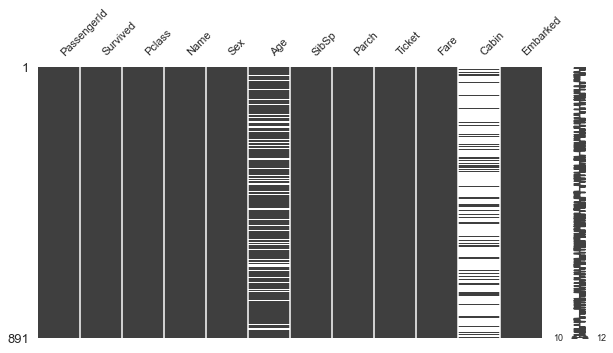

In [6]:
#Visualizing the missing data
import missingno as msno
msno.matrix(raw_data, figsize=(10,5), fontsize=11)
# notice that the white bars visualize the missing values

###  Identifying individual passengers with Missing information

In [7]:
# Select Passengers with unknown age
#  We use .isnull() rows with no value
unknown_age = raw_data[raw_data["Age"].isnull()]

# limit output to 20 rows
unknown_age[["PassengerId","Name", "Survived", "Age"]][:20]

,PassengerId,Name,Survived,Age
5,6,"Moran, Mr. James",0,NaN
17,18,"Williams, Mr. Charles Eugene",1,NaN
19,20,"Masselmani, Mrs. Fatima",1,NaN
26,27,"Emir, Mr. Farred Chehab",0,NaN
28,29,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN
29,30,"Todoroff, Mr. Lalio",0,NaN
31,32,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN
32,33,"Glynn, Miss. Mary Agatha",1,NaN
36,37,"Mamee, Mr. Hanna",1,NaN
42,43,"Kraeff, Mr. Theodor",0,NaN


##### The above technique shows  a list of passengers with age as the missing information, next we use AND to see how many passengers are missing both the cabin and Age information




In [8]:
# finding those missing both age or cabin information
# Find those missing age or cabin information
missing_age = raw_data["Age"].isnull()
missing_cabin = raw_data["Cabin"].isnull()

# Find those missing both
unknown_age_and_cabin = raw_data[missing_age & missing_cabin]
print("Number of passengers missing age and cabin information:", len(unknown_age_and_cabin))

Number of passengers missing age and cabin information: 158


#####  The information above shows that most passengers missing age nformation are also missing cabin information.
Normally, from here, we would want to know why we have this issue. A good hypothesis is that information was not collected well for the passengers with the cheap tickets.

Let's plot a histogram of ticket classes.

### Filling Missing values


In [9]:
#lets start by removing the Embarked column whichhas less values missing
print(f"The original size of our dataset was", raw_data.shape)

clean_data = raw_data.dropna( subset=["Embarked"])
clean_data = clean_data.reindex()

print(f"The shape of the clean dataset is", clean_data.shape)

The original size of our dataset was (891, 12)
The shape of the clean dataset is (889, 12)


### Using mean values and median to replace the missing data
In some circumstances we cannot afford to remove tooo much data Here we will fill the missing data with average

below , we  will impute data for the age field. We use the mean age from the remaining rows, given that >80% of these are not empty

In [10]:
raw_data.isna().sum()*100/len(raw_data)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
# calculating the mean value of the age column 
mean_age = clean_data["Age"].mean()

#replacing the empty values with the mean

clean_data["Age"].fillna(mean_age, inplace=True)

#eying the clean dataset
print(clean_data.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               0


In [12]:
clean_data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24',

###  Assigning a new category to unknown categorical data
The cabin field is categorical field because there is finite number of possible options for cabins in Titanic. Unfortunately , many records have no cabin listed.

For this kind of situation it makes sense to create an unknown category and assign it to the unknown cases

In [13]:
# assign unknown to records where "Cabin" is empty
clean_data["Cabin"].fillna("Unknown", inplace=True)

print(clean_data.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0


In [14]:
df= clean_data.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


### Visualizing  Ordinal Data
The ordinal data available is 

1. Pclass= the ticket class
2. Parch = The number of parents or children on the ship
3. sibsip = The number of siblings or spouses on the ship

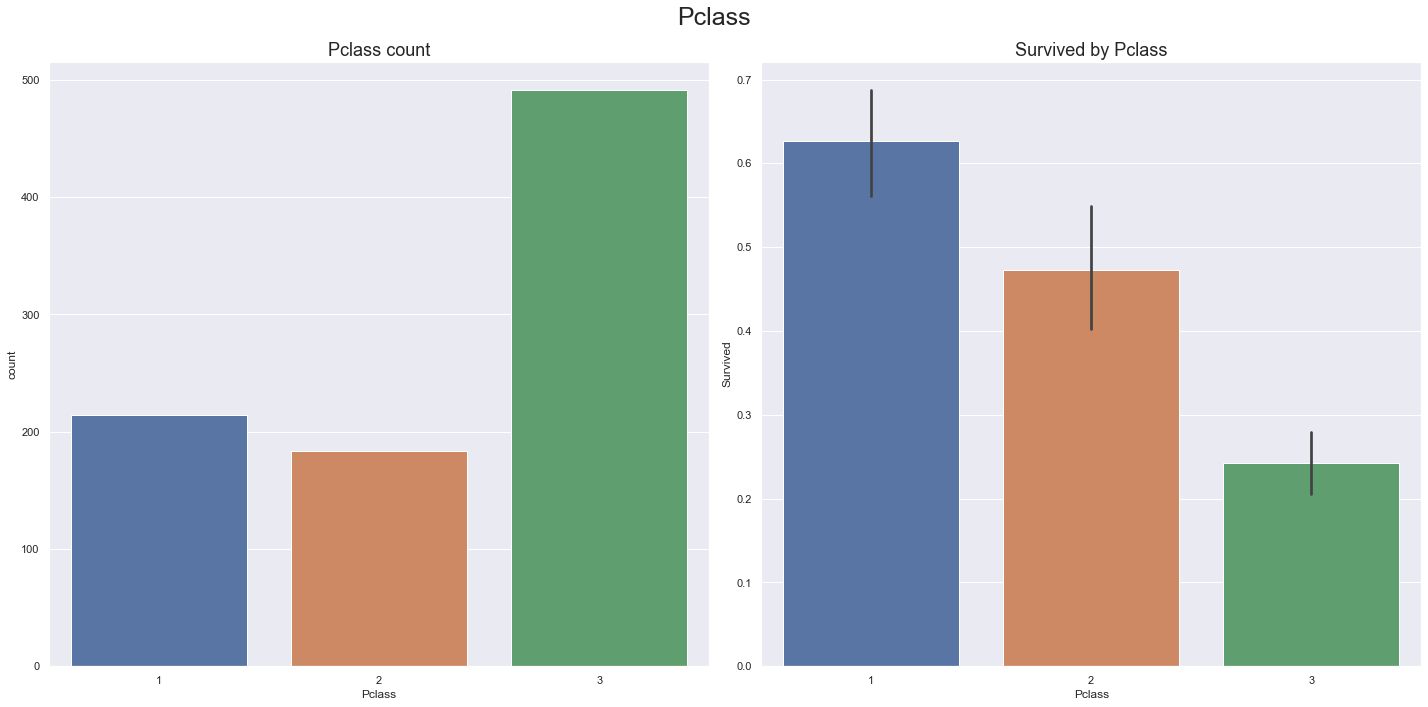

In [15]:
#visualizing the Pclass column
plt.figure(figsize=(20,10))
plt.suptitle("Pclass", fontsize= 25)

plt.subplot(1,2,1)
sns.countplot(x="Pclass", data=df)
plt.title("Pclass count", fontsize=18)

#Plotting the Pclass against the survival chances
plt.subplot(1, 2, 2)
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survived by Pclass", fontsize=18)

plt.tight_layout()
plt.show()

####  Insights
The passengers with Pclass 1 and 2 appear to have been in teh same number, while  the passengers in with Pclass 3 were  more than twice of that of P1 and P2 class

The passengers in the Pclass 1 had higher survival chances, followed by the Pclass 2 and the least number of passengers who survived  were from Pclass 3

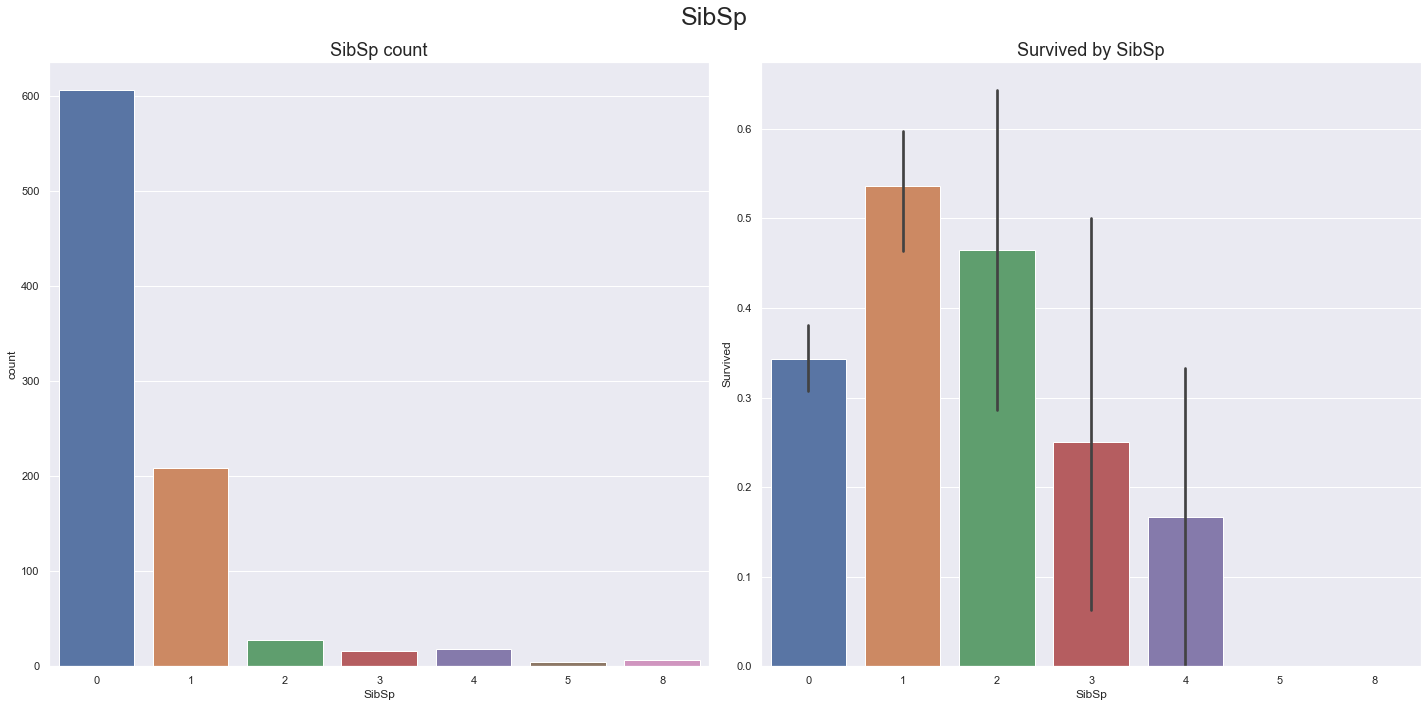

In [16]:
plt.figure(figsize=(20,10))
plt.suptitle("SibSp", fontsize=25)

plt.subplot(1,2,1)
sns.countplot(x="SibSp", data=df)
plt.title("SibSp count", fontsize=18)

plt.subplot(1,2,2)
sns.barplot(x="SibSp", y="Survived", data=df)
plt.title("Survived by SibSp", fontsize=18)

plt.tight_layout()
plt.show()

### Insights

Most of the passengers on the ship had no sibling or spouse followed by people having one of them. There was almost a neglible number of people with no siblings or spouse

Passengers having one or two siblings and spouse were the highest among survived passengers, followed by having none, three, and four respectively.


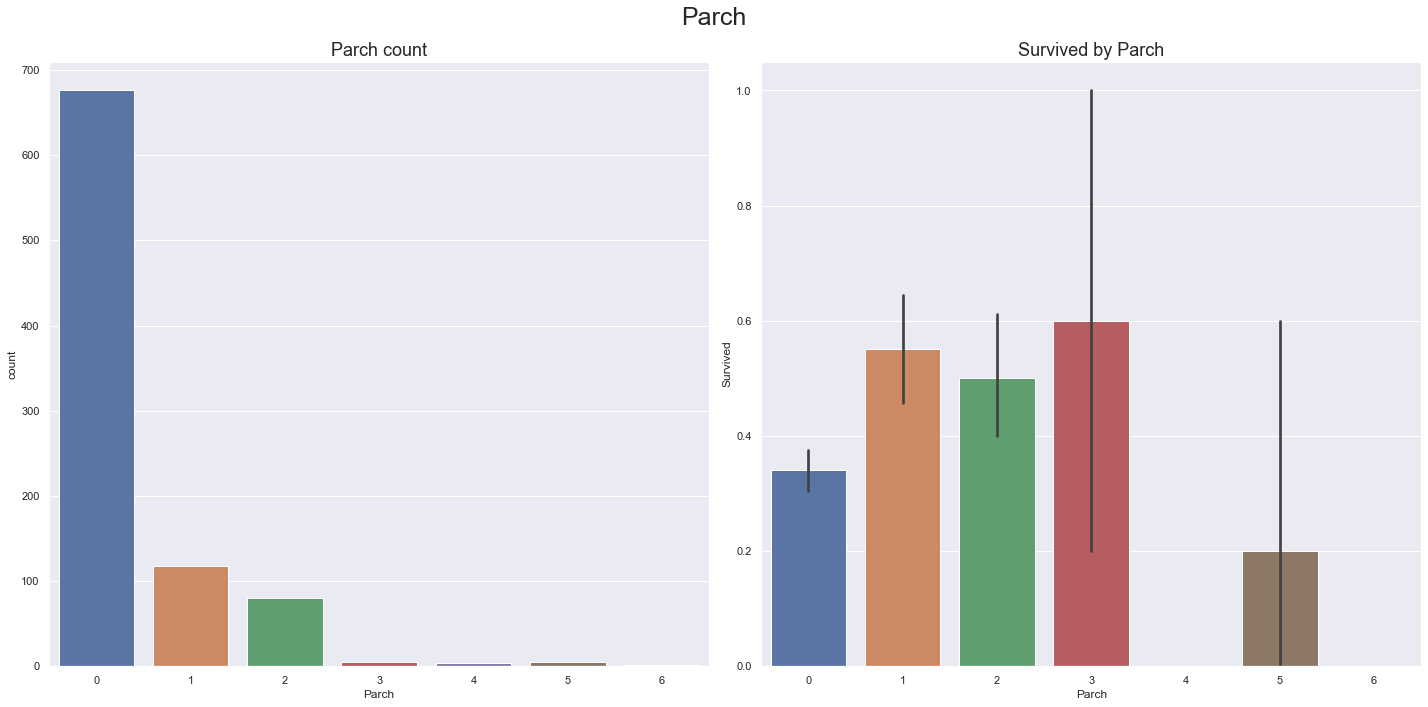

In [17]:
plt.figure(figsize=(20, 10))
plt.suptitle("Parch", fontsize=25)

plt.subplot(1, 2, 1)
sns.countplot(x="Parch", data=df)
plt.title("Parch count", fontsize=18)

plt.subplot(1, 2, 2)
sns.barplot(x="Parch", y="Survived", data=df)
plt.title("Survived by Parch", fontsize=18)

plt.tight_layout()
plt.show()

### Insights

Most of the people on the ship had no parent or children with them, followed by having one and two of them.
The passengers having chilren or parents were almost neglible.

Passengers having parents or children were more among the survived passengers. The order was 3 > 1 > 2 > 0 > 5.

### Visualizing Continous Data 
 The best plots to view continuous data are usually;
 
 An XY scatter plot, which is best for a relationship between two continious features.
 
 We can also use Histograms or BOx and Whisker plots, to look at the spread of data
 
 In the dataset, we visualize age and Fare as they are the continous variables

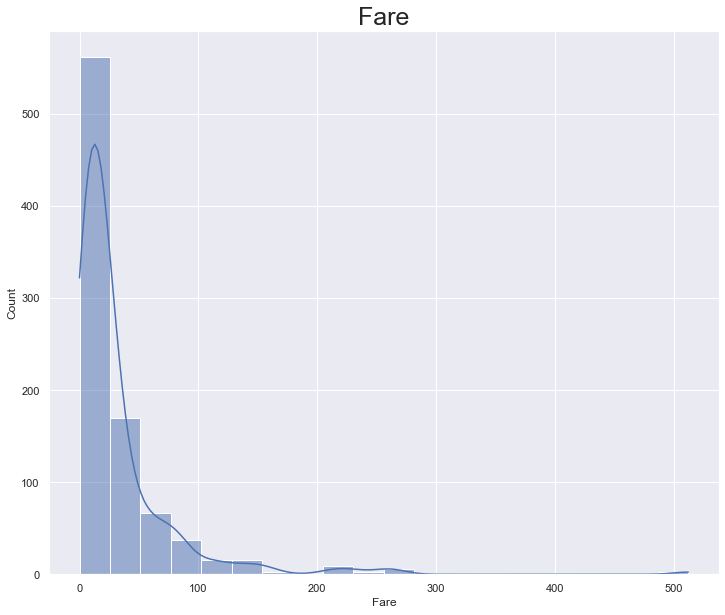

In [18]:
plt.figure(figsize=(12,10))
sns.histplot(x="Fare", kde=True, bins=20, data=df)
plt.title("Fare", fontsize=25)
plt.show()

### Insights
The fare of passengerson the ship was mostly distributed between 0-25

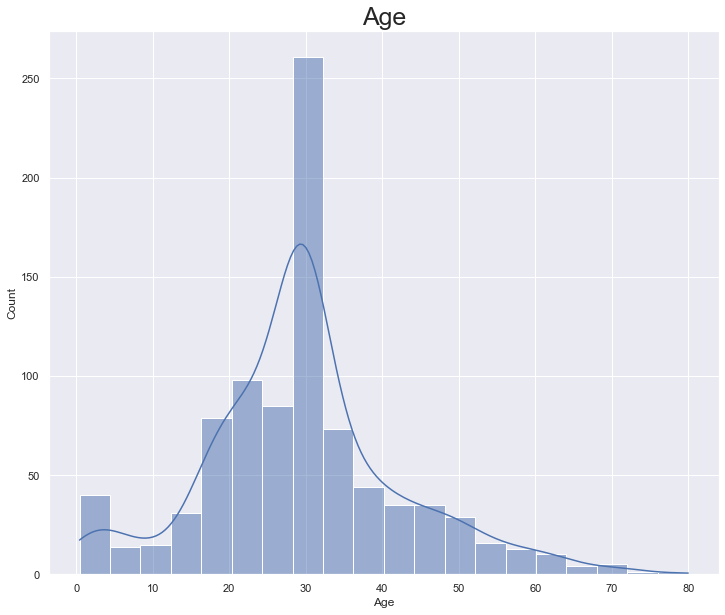

In [19]:
plt.figure(figsize=(12, 10))
sns.histplot(x="Age", kde=True, bins=20, data=df)
plt.title("Age", fontsize=25)
plt.show()

### Insights
The age of the passengers is mostly distributed within the range of 16-36 years

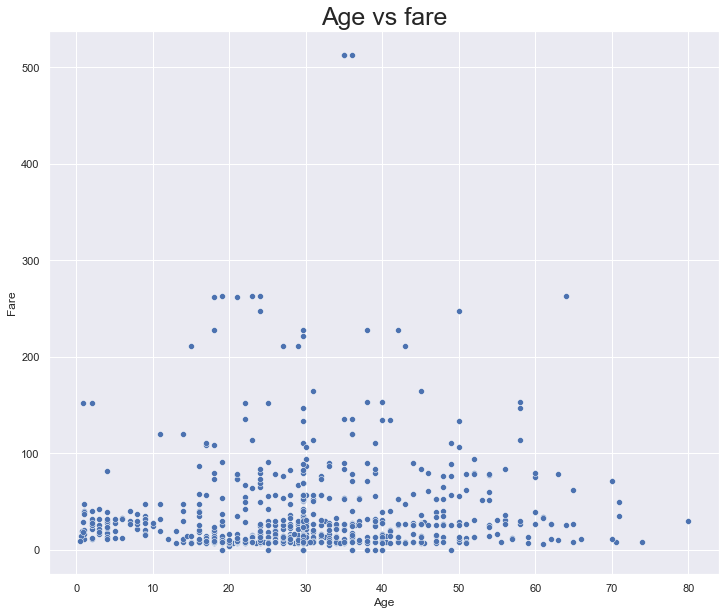

In [20]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x="Age", y="Fare", data=df)
plt.title("Age vs fare", fontsize=25)
plt.show()


### Insights
There isn't an obvious relationship between Age and Fare.

Does the cost of a fare or the person's age have any relationship with likelihood of survival?

In [21]:
df["Fare"].unique()

fare_group = []

for i in df["Fare"]:
    if i <= 25:
        fare_group.append("Low")
    elif i <= 100:
        fare_group.append("Medium")
    else:
        fare_group.append("High")
        
df["fare_group"] = fare_group


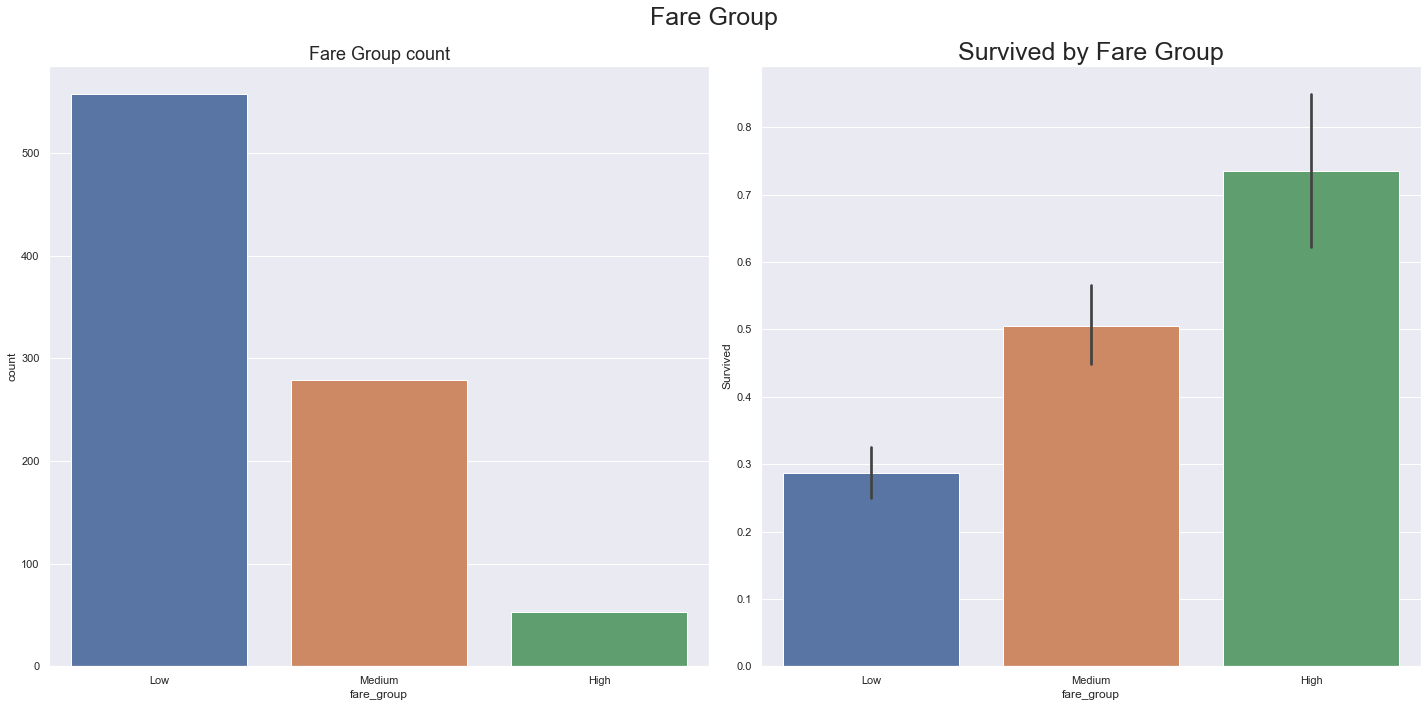

In [22]:

plt.figure(figsize=(20, 10))
plt.suptitle("Fare Group", fontsize=25)

plt.subplot(1,2,1)
sns.countplot(x="fare_group", data=df)
plt.title("Fare Group count", fontsize=18)

plt.subplot(1,2,2)
sns.barplot(x="fare_group", y="Survived", data=df)
plt.title("Survived by Fare Group", fontsize=25)
    
plt.tight_layout()
plt.show()

### Insights

1.A big number of the passengers belonged to a low category, followed by medium and high fare

2. Among the survived passengers,a high number belonged to the high category, then teh medium and the low fare


In [23]:

age_group = []

for i in df["Age"]:
    if i <=18:
        age_group.append("Minor")
    elif i <=40:
        age_group.append("Young")
    elif i <=60:
        age_group.append("Middle-Aged")
    else:
        age_group.append("Senior Citizen")
        
df["age_group"]= age_group

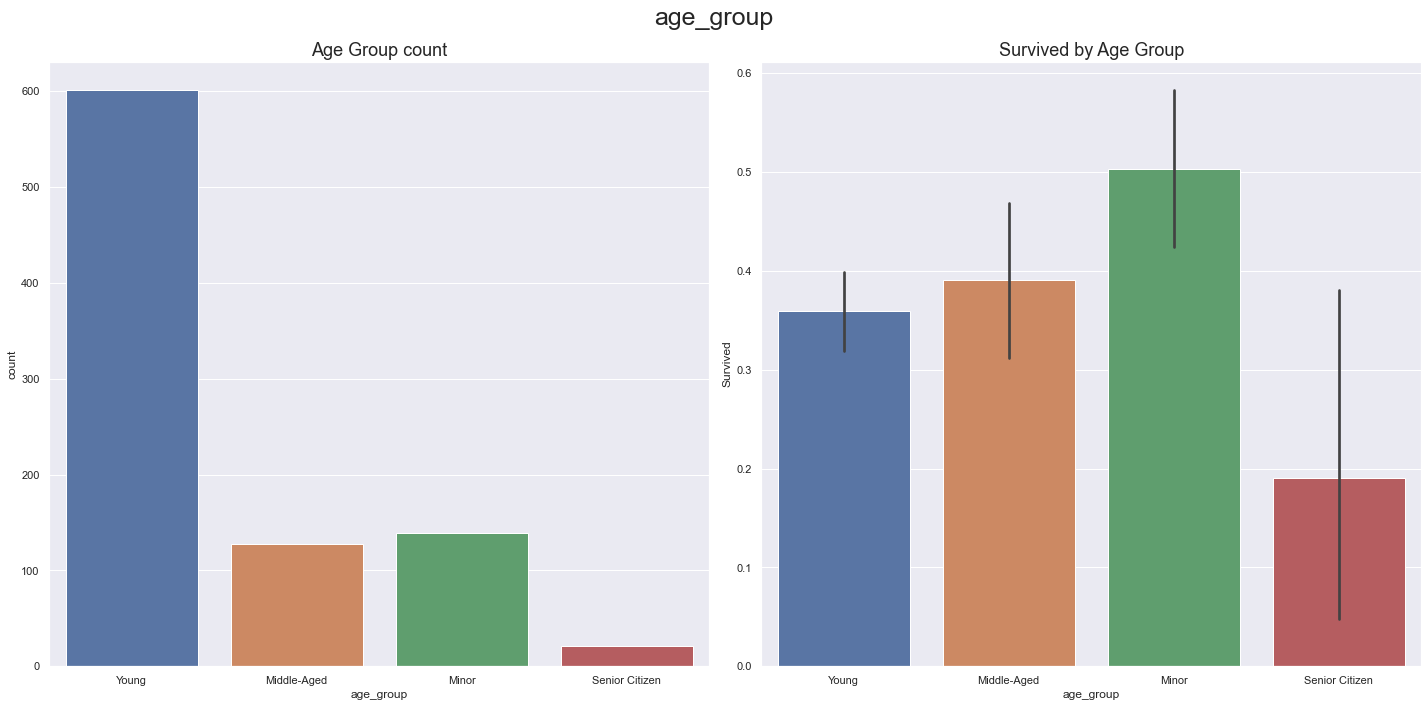

In [24]:
plt.figure(figsize=(20, 10))
plt.suptitle("age_group", fontsize=25)

plt.subplot(1, 2, 1)
sns.countplot(x="age_group", data=df)
plt.title("Age Group count", fontsize=18)

plt.subplot(1, 2, 2)
sns.barplot(x="age_group", y="Survived", data=df)
plt.title("Survived by Age Group", fontsize=18)

plt.tight_layout()
plt.show()

### Insights

Most of the people aboard the ship were young, followed by Senior Citizens. Middle Aged people and minors were almost same in number.

Most of the people saved belonged to Minor age group while Senior Citizens were the least in number among saved people. Young and Middle-Aged were almost equal.

### Visualizing Categorical Data

Sex which is either male or female

Embarked- the port of embarkation(C, Q, S)

Cabin(many options

Survival(0=no, 1=yes)

Plotting categorical data against other categorical data lets us see how data is clustered. This is little more than a coloured table

In [28]:
import plotly.graph_objects as go
import plotly.express as px

#creating some simple functions
def get_rows(sex, port):# this returns the value that match in terms of sex and embarkment port
    return df[(df.Embarked == port) & (df.Sex == sex)]

def proportion_survived(sex, port):#this returns the proportion of people meating criteria who survived
    survived = get_rows(sex, port).Survived
    return np.mean(survived)

#making two columns of fata togethere these represent each combination of sex and embarkment port

sexes = ["male", "male", "male", "female", "female", "female"]
ports = ["C", "Q", "S"]*2

# calculate the number of passengers at each port +sex combination
passenger_count = [len(get_rows(sex,port)) for sex ,port in zip(sexes, ports)]

# calculate the proportion of passengees from each port + sex combination who surivived
passenger_survival = [proportion_survived(sex, port) for sex, port in zip(sexes, ports)]

#combining into a single data frame

table = pd.DataFrame(dict(sex=sexes, port=ports, passenger_count=passenger_count, passenger_survival_rate=passenger_survival))
   
# Making a bubble plot
# This is just a scatter plot but each entry in the plot has a size or color to passenger_survival and size to the number of passengers
plt.scatter(color="passenger_survival_rate", 
                    size="passenger_count", title="Bubble Plot of Categorical Data")   
plt.show()
    

NameError: name 'y' is not defined